In [3]:
import pandas as pd
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
data = pd.read_csv("/content/drive/MyDrive/data/dataset/train.csv")
test_data= pd.read_csv("/content/drive/MyDrive/data/dataset/test.csv")
# df = pd.read_csv('hepatitis.csv', low_memory=False)

MEAN PREDICTION

In [6]:
# df2= new.drop(['zscore'],axis=1)
df2= data.copy()
df2=df2[df2['PRODUCT_LENGTH']<766]
df2

,PRODUCT_ID,TITLE,BULLET_POINTS,DESCRIPTION,PRODUCT_TYPE_ID,PRODUCT_LENGTH
1,2673191,Marks & Spencer Girls' Pyjama Sets T86_2561C_N...,"[Harry Potter Hedwig Pyjamas (6-16 Yrs),100% c...",NaN,2755,393.700000
2,2765088,PRIKNIK Horn Red Electric Air Horn Compressor ...,"[Loud Dual Tone Trumpet Horn, Compatible With ...","Specifications: Color: Red, Material: Aluminiu...",7537,748.031495
4,283658,The United Empire Loyalists: A Chronicle of th...,NaN,NaN,6112,598.424000
6,413758,Ungifted: My Life and Journey,NaN,NaN,23,598.000000
8,2050239,PUMA Cali Sport Clean Women's Sneakers White L...,[Style Name:-Cali Sport Clean Women's Sneakers...,NaN,3302,393.700000
...,...,...,...,...,...,...
2249688,575288,Along a Burning Highway,NaN,Welcome to the wonderfully Wicked World of Aut...,123,598.424000
2249690,1096345,United Colors of Benetton United Dreams Love Y...,[Quantity: 80ml; The new floral and feminine f...,NaN,253,600.000000
2249691,571566,Comedy Wildlife Photography Awards: The perfec...,NaN,NaN,2968,271.250000
2249692,2690647,Olmeo 14 LED Round Fog Light 4 Inches Waterpro...,"[Easy to install;,Round shape 14LED spot worki...",NaN,7978,590.550000


In [8]:
df2= df2.drop(['TITLE','BULLET_POINTS','DESCRIPTION','PRODUCT_ID'],axis=1)

In [10]:
df2.shape

(1301395, 2)

In [11]:
grouped = df2.groupby(['PRODUCT_TYPE_ID'])['PRODUCT_LENGTH'].mean().reset_index()

# Preview the first few rows of the grouped dataframe
print(grouped.head())


   PRODUCT_TYPE_ID  PRODUCT_LENGTH
0                0      450.314104
1                1      571.087619
2                2      414.399079
3                3      428.124789
4                4      409.042132


In [12]:
print( grouped[grouped['PRODUCT_TYPE_ID']==2755] )

      PRODUCT_TYPE_ID  PRODUCT_LENGTH
2566             2755      435.209563


In [ ]:
df2.head()

,PRODUCT_TYPE_ID,PRODUCT_LENGTH
1,2755,393.700000
2,7537,748.031495
4,6112,598.424000
6,23,598.000000
8,3302,393.700000


In [ ]:
435.209563 - 393.700000

41.509563000000014

In [ ]:
# import pandas as pd

# from sklearn.metrics import mean_absolute_percentage_error

# # Calculate mean of target variable
# mean_target = target_variable.mean()
# # Create a new column to store predicted values
# test_data['predicted'] = mean_target
# #product length of group

# mean_absolute_percentage_error(df2, grouped['PRODUCT_LENGTH'])  
# # Evaluate model performance using mean squared error
# mse = mean_squared_error(test_target_variable, test_data['predicted'])
# print('Mean Squared Error:', mse)


In [13]:
import pandas as pd

# group by product ID and calculate the mean of product length
grouped1 = df2.groupby("PRODUCT_TYPE_ID")["PRODUCT_LENGTH"].mean().reset_index()

# sort the values by product ID
grouped1 = grouped1.sort_values("PRODUCT_TYPE_ID")

# rename the columns to match the original names
grouped1 = grouped1.rename(columns={"PRODUCT_TYPE_ID": "PRODUCT_TYPE_ID", "PRODUCT_LENGTH": "PRODUCT_LENGTH"})

# merge the grouped dataframe with the original dataframe on product ID
merged = pd.merge(df2, grouped1, on="PRODUCT_TYPE_ID")

# the mean of each product ID is added as a new column "PRODUCT_LENGTH_MEAN"
print(merged.head())

   PRODUCT_TYPE_ID  PRODUCT_LENGTH_x  PRODUCT_LENGTH_y
0             2755             393.7        435.209563
1             2755             500.0        435.209563
2             2755             600.0        435.209563
3             2755             700.0        435.209563
4             2755             700.0        435.209563


In [14]:
merged['PRODUCT_LENGTH_y']

0          435.209563
1          435.209563
2          435.209563
3          435.209563
4          435.209563
              ...    
1301390    750.000000
1301391    629.921259
1301392     39.000000
1301393    500.000000
1301394     43.307000
Name: PRODUCT_LENGTH_y, Length: 1301395, dtype: float64

In [ ]:
merged['PRODUCT_LENGTH_y']

0          435.209563
1          435.209563
2          435.209563
3          435.209563
4          435.209563
              ...    
1301390    750.000000
1301391    629.921259
1301392     39.000000
1301393    500.000000
1301394     43.307000
Name: PRODUCT_LENGTH_y, Length: 1301395, dtype: float64

In [ ]:
grouped.tail()

,PRODUCT_TYPE_ID,PRODUCT_LENGTH
11121,13415,386.250000
11122,13416,538.419938
11123,13417,525.000000
11124,13419,314.285714
11125,13420,447.637795


In [ ]:
uniquetest=test['PRODUCT_TYPE_ID'].unique()
uniquetest

array([2755, 7537, 6112, ..., 5828, 4505, 9440], dtype=int64)

In [ ]:
# # filter the DataFrame to include only rows where col1 == 1650
# filtered_df = test[test['PRODUCT_TYPE_ID']==2755]
# print(filtered_df)
# # calculate the mean of the filtered column
# mean_filtered = filtered_df['PRODUCT_TYPE_ID'].mean()

# print(mean_filtered)
# # test['meanPTID']=test.loc[test['meanPTID']].mean()

# # test.loc[test['PRODUCT_TYPE_ID'] == 1650, 'meanPTID'] = mean_filtered




In [ ]:
# test.loc[test['PRODUCT_TYPE_ID'] == 2755, 'mean'] = mean
# test

In [ ]:
# test[test["PRODUCT_TYPE_ID"]==1650]

In [15]:
X=merged['PRODUCT_TYPE_ID']
X

0           2755
1           2755
2           2755
3           2755
4           2755
           ...  
1301390     8235
1301391    13306
1301392     5828
1301393     4505
1301394     9440
Name: PRODUCT_TYPE_ID, Length: 1301395, dtype: int64

In [16]:
y=merged['PRODUCT_LENGTH_y']
y

0          435.209563
1          435.209563
2          435.209563
3          435.209563
4          435.209563
              ...    
1301390    750.000000
1301391    629.921259
1301392     39.000000
1301393    500.000000
1301394     43.307000
Name: PRODUCT_LENGTH_y, Length: 1301395, dtype: float64

In [19]:
X= X.values.reshape(-1,1)

In [20]:
X

array([[2755],
       [2755],
       [2755],
       ...,
       [5828],
       [4505],
       [9440]])

In [21]:
# Create linear regression object
from sklearn import linear_model
reg = linear_model.LinearRegression()
reg.fit(X,y)

LinearRegression()

In [22]:
pickle.dump(reg, open('model.pkl','wb'))

NameError: ignored

In [ ]:
from sklearn.metrics import mean_squared_error
target_variable = test['PRODUCT_LENGTH']

In [ ]:
mean_target = target_variable.mean()
mean_target

981.8800192979227

Test Data

In [24]:
test_data= test_data.drop(['TITLE','BULLET_POINTS','DESCRIPTION','PRODUCT_ID'],axis=1)

In [25]:
test_data

,PRODUCT_TYPE_ID
0,6142
1,1622
2,7540
3,12442
4,6318
...,...
734731,7073
734732,1
734733,10645
734734,12680


In [27]:
X_test=test_data['PRODUCT_TYPE_ID']

In [31]:
X_test=X_test.values.reshape(-1,1)

In [32]:
y_pred = reg.predict(X_test)
y_pred

array([479.26072943, 496.16062066, 474.03372768, ..., 462.42439974,
       454.81570977, 502.22513915])

In [34]:
sub= pd.read_csv('/content/drive/MyDrive/data/dataset/sample_submission.csv')

In [35]:
sub['PRODUCT_LENGTH']=y_pred

In [36]:
sub.to_csv("Submission_7.csv",index=False)

In [ ]:
test_data['product_length'] = y_pred

In [ ]:
test_target_variable = test_data['target_pred']

In [ ]:
test_data['predicted'] = mean_target
test_data=test_data.drop(['target_pred'],axis=1)
test_data

,PRODUCT_ID,TITLE,BULLET_POINTS,DESCRIPTION,PRODUCT_TYPE_ID,predicted,product_length
0,604373,Manuel d'Héliogravure Et de Photogravure En Re...,NaN,NaN,6142,981.880019,1014.458183
1,1729783,DCGARING Microfiber Throw Blanket Warm Fuzzy P...,[QUALITY GUARANTEED: Luxury cozy plush polyest...,<b>DCGARING Throw Blanket</b><br><br> <b>Size ...,1622,981.880019,945.912401
2,1871949,I-Match Auto Parts Front License Plate Bracket...,"[Front License Plate Bracket Made Of Plastic,D...",Replacement for The Following Vehicles:2020 LE...,7540,981.880019,1035.658847
3,1107571,PinMart Gold Plated Excellence in Service 1 Ye...,[Available as a single item or bulk packed. Se...,Our Excellence in Service Lapel Pins feature a...,12442,981.880019,1109.997657
4,624253,"Visual Mathematics, Illustrated by the TI-92 a...",NaN,NaN,6318,981.880019,1017.127222
...,...,...,...,...,...,...,...
734731,921419,"Casual Canine Basic Hoodie for Dogs, 16"" Mediu...",[Brightly colored pet sweatshirts with authent...,"ZA6015 16 43 Size-See Chart Below: Medium: 16""...",7073,981.880019,1028.576794
734732,2456362,Dive Log Book: Scuba Diving Logbook for Beginn...,NaN,NaN,1,981.880019,921.329942
734733,841529,Axor 39135001 Citterio Widespread Faucet with ...,"[8-Inch centers,1/2-Inch IPS inlets,9-Inch spo...",39135001 Features: -ADA compliant. -Includes p...,10645,981.880019,1082.746160
734734,1190194,Caroline's Treasures BB1801DS812 Halloween Bas...,"[Indoor or outdoor aluminum artwork prints,8 i...",Features. Great for inside or outside these Al...,12680,981.880019,1113.606927


In [ ]:
final=new[new['zscore']<3]
final

,PRODUCT_TYPE_ID,PRODUCT_LENGTH,zscore
0,1650,2125.980000,-0.001440
1,2755,393.700000,-0.002721
2,7537,748.031495,-0.002459
3,2996,787.401574,-0.002430
4,6112,598.424000,-0.002570
...,...,...,...
2249693,3009,1181.100000,-0.002139
2249694,3413,125.984252,-0.002919
2249695,1574,1200.000000,-0.002125
2249696,592,2900.000000,-0.000867


In [ ]:
final[final['zscore']>3]

,PRODUCT_TYPE_ID,PRODUCT_LENGTH,zscore


In [ ]:
new[new['zscore']<-3]

,PRODUCT_TYPE_ID,PRODUCT_LENGTH,zscore


In [ ]:
new[(new.zscore<-3) | (new.zscore>3)]

,PRODUCT_TYPE_ID,PRODUCT_LENGTH,zscore
13229,3069,6629200.0,4.901386
27561,3069,8466600.0,6.260726
42663,3072,5519100.0,4.080114
50234,4625,4935900.0,3.648653
54146,3069,8428900.0,6.232835
...,...,...,...
2231433,3073,8881200.0,6.567455
2235221,3075,7500900.0,5.546284
2238917,3069,9449700.0,6.988041
2239415,3073,8874200.0,6.562276


<AxesSubplot: xlabel='PRODUCT_LENGTH'>

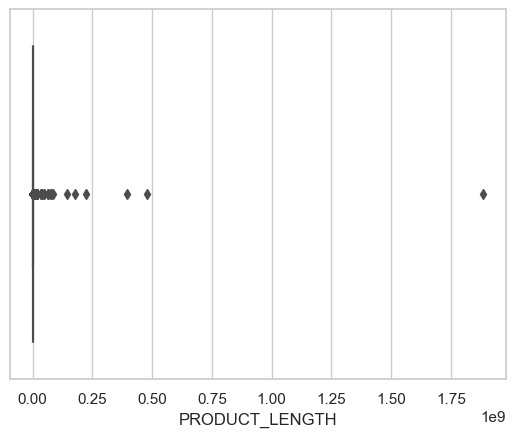

In [ ]:
sns.boxplot(x=new["PRODUCT_LENGTH"])

In [ ]:
!pip install openpyxl

                                              0.0/250.0 kB ? eta -:--:--
     ---                                   20.5/250.0 kB 330.3 kB/s eta 0:00:01
     ---------                             61.4/250.0 kB 544.7 kB/s eta 0:00:01
     -------------                         92.2/250.0 kB 581.0 kB/s eta 0:00:01
     --------------------                 143.4/250.0 kB 708.1 kB/s eta 0:00:01
     -------------------------            174.1/250.0 kB 700.2 kB/s eta 0:00:01
     --------------------------------     225.3/250.0 kB 724.0 kB/s eta 0:00:01
     ------------------------------------ 250.0/250.0 kB 696.9 kB/s eta 0:00:00


<AxesSubplot: xlabel='PRODUCT_LENGTH', ylabel='PRODUCT_TYPE_ID'>

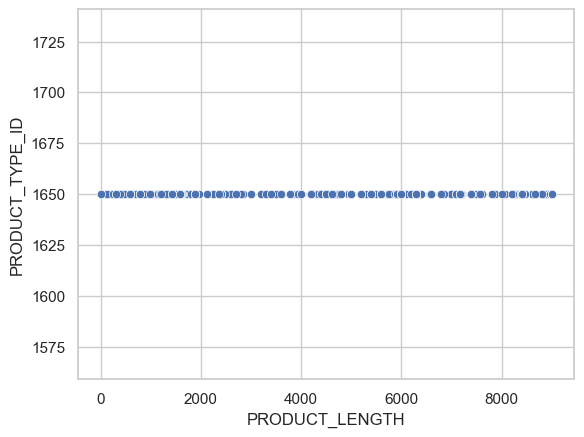

In [ ]:
sns.set(style='whitegrid')
fmri = sns.load_dataset("fmri")
 
sns.scatterplot(x="PRODUCT_LENGTH", y="PRODUCT_TYPE_ID", data=test[test["PRODUCT_TYPE_ID"]==1650])




In [ ]:
import numpy as np
import statsmodels.api as sm
# Fit and summarize OLS model
model = sm.OLS(y, X)
res = model.fit()
print(res.summary())

                                 OLS Regression Results                                
Dep. Variable:         PRODUCT_LENGTH   R-squared (uncentered):                   0.241
Model:                            OLS   Adj. R-squared (uncentered):              0.241
Method:                 Least Squares   F-statistic:                          7.062e+05
Date:                Sun, 23 Apr 2023   Prob (F-statistic):                        0.00
Time:                        18:13:05   Log-Likelihood:                     -1.9110e+07
No. Observations:             2222729   AIC:                                  3.822e+07
Df Residuals:                 2222728   BIC:                                  3.822e+07
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                      coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------

In [ ]:
reg.predict([[1650]])

C:\Users\Charmi Tank\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([1247.05064619])

In [ ]:
import sklearn.metrics as metrics
score = 100*(1-metrics.mean_absolute_percentage_error(y,reg.predict(X)))
score

-202.2772853675124

In [ ]:
!pip install -U sentence-transformers



In [ ]:
import pandas as pd

# create a sample DataFrame
df = pd.DataFrame({'col1': [1, 2, 3, 1, 5,5,5,5,5,5]})

# find all occurrences of 1 in 'col1'
one_rows = df[df['col1'] == 1]

# calculate the mean of 'col1' where 'col1' equals 1
one_mean = one_rows['col1'].mean()

# create a new column with the mean values
df['one_mean'] = one_mean

# update the mean column with the corresponding mean values where 'col1' equals 1
df.loc[df['col1'] == 1, 'one_mean'] = one_mean

print(df)


   col1  one_mean
0     1       1.0
1     2       1.0
2     3       1.0
3     1       1.0
4     5       1.0
5     5       1.0
6     5       1.0
7     5       1.0
8     5       1.0
9     5       1.0
